# Assignment 2

## A bit of info before you start.


> ***First and foremost, dont use AI to code. Use it to understand and then write code yourself. Use AI to verify if the code you wrote it correct, that will help you learn far far more.***

> ***Implement Stuff from sratch. Use cv2 functions only when numpy implementation can be extremely tedious.***



You will need to use your own image for this assignment, which you need to import into here.
If you cant fetch your image from any APIs that dont need credentials, then :
To preserve an image in Google Colab without a continuous runtime or using Google Drive, you can use base64 string encoding of images ( its really simple )

First, begin by normally uploading the image into the contents folders as you normally do in colab or fetch it using Drive or any API.

To get the base64 string :
```
import base64
with open("your_image.jpg", "rb") as img_file:
    print(base64.b64encode(img_file.read()).decode())
```

Note that the base64 string is a very long string, click on the three dot icon to the left of the current code cell and click on <code> Copy Cell Output </code> to easily copy it to your clipboard.

Then, to embed the string into your Jupyter Notebook :
```
from PIL import Image
import io
import base64
import matplotlib.pyplot as plt
import numpy as np

# PASTE BASE64 STRING HERE
base64_image = "iVBORw0K..."  # long base64 string

img_data = base64.b64decode(base64_image)
img = Image.open(io.BytesIO(img_data))

plt.imshow(img)
plt.axis("off")
```
The string is really long so, use a multiline string in python ( syntax : """ """ )

Otherwise, you can also choose to use any API ( try researching on https://picsum.photos/ )

## Part A

1. Grayscale Histogram - load you image and then write a function <code>gray_histogram</code>. Details below :
```
Requirements:
Function Signature : gray_histogram(gray_img)
1. Input is a non-normalized grayscale image (values 0–255)
2. Use pure NumPy loops
3. No OpenCV histogram functions allowed
```
Then plot using matplotlib.


2. RGB Histogram - do the same for an RGB image, final result should look like the one attached in the lecture slides. But, ONLY using Numpy. Plot using matplotlib. ( If you get 1st part, this is very easy )


In [43]:
# Your PART A codes follow here. You can create more cells under this. Write clean and commented code.


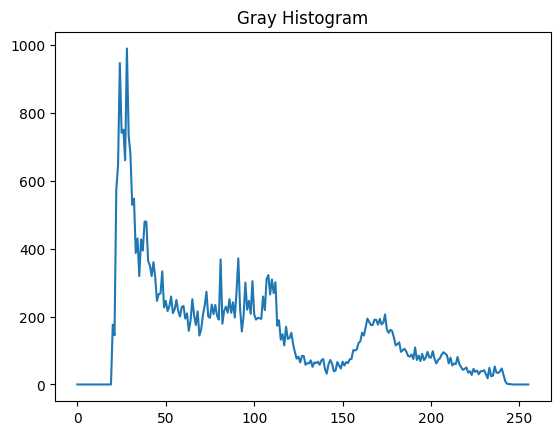

In [44]:
import numpy as np
import cv2
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Fetch image
url = "https://picsum.photos/200"
response = requests.get(url)
img_pil = Image.open(BytesIO(response.content))

# Convert PIL -> numpy
img_old = np.array(img_pil)

# Convert RGB -> BGR for cv2
img = cv2.cvtColor(img_old, cv2.COLOR_RGB2BGR)

# Convert to Gray
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Histogram function
def gray_histogram(gray_img):
    hist = np.zeros(256, dtype=np.int32)
    rows, cols = gray_img.shape
    for i in range(rows):
        for j in range(cols):
            hist[gray_img[i, j]] += 1
    return hist

# Compute hist
hist = gray_histogram(gray)

# Plot
plt.plot(hist)
plt.title("Gray Histogram")
plt.show()


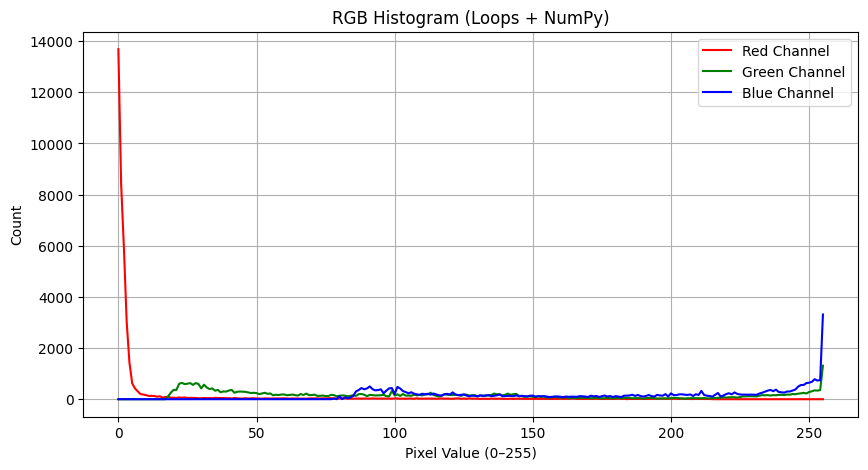

In [45]:
def rgb_histogram(rgb_img):
    """
    Computes the R, G, B histograms using loops (no cv2 functions).
    Input: RGB image as numpy array
    Output: hist_r, hist_g, hist_b (each size 256)
    """
    hist_r = np.zeros(256, dtype=np.int32)
    hist_g = np.zeros(256, dtype=np.int32)
    hist_b = np.zeros(256, dtype=np.int32)

    rows, cols, _ = rgb_img.shape

    for i in range(rows):
        for j in range(cols):
            r, g, b = rgb_img[i, j]
            hist_r[r] += 1
            hist_g[g] += 1
            hist_b[b] += 1

    return hist_r, hist_g, hist_b

# Compute histograms

hist_r, hist_g, hist_b = rgb_histogram(img_old)

# Plot the RGB histograms

plt.figure(figsize=(10,5))
plt.plot(hist_r, color="red", label="Red Channel")
plt.plot(hist_g, color="green", label="Green Channel")
plt.plot(hist_b, color="blue", label="Blue Channel")

plt.title("RGB Histogram (Loops + NumPy)")
plt.xlabel("Pixel Value (0–255)")
plt.ylabel("Count")
plt.legend()
plt.grid(True)
plt.show()

## Part B

#### RGB to HSV ( only Numpy ofc )
Write a function <code>rgb_to_hsv</code> that takes a 0-255 ( not normalised ) RGB image and returns an HSV image ( also not normalised ).

**Note :** Research for the formulas, maybe ask some AI to explain you the algo and formulas ( NOT to give you the code, seriously youre not gonna learn anything if you do that )

The output should be in a format that is compatible with OpenCV cvtColor. Read the documentation to find out any Hue scaling etc.
Finally, use your function and test it by using cv2.cvtColor to convert your function output into RGB again and display it. Your image will appear the same after reconversion into RGB.

In [46]:
# Your PART B codes follow here. You can create more cells under this. Write clean and commented code.

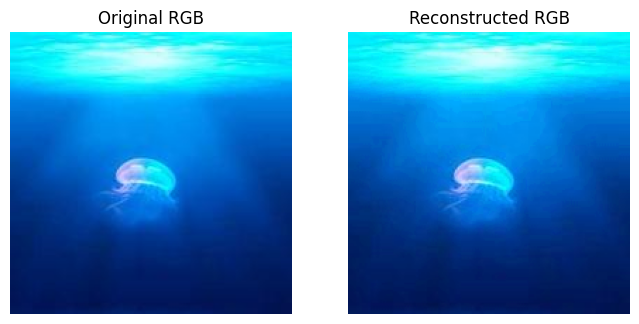

In [47]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# ----------------------------------------------------
# Custom RGB → HSV (OpenCV-compatible)
# ----------------------------------------------------
def rgb_to_hsv(rgb_img):
    """
    Convert a 0–255 RGB image to HSV (OpenCV format) using only NumPy.
    Output H in [0,179], S,V in [0,255].
    """
    rgb_img = rgb_img.astype(np.float32)
    rows, cols, _ = rgb_img.shape

    hsv = np.zeros_like(rgb_img, dtype=np.float32)

    for i in range(rows):
        for j in range(cols):
            r, g, b = rgb_img[i, j] / 255.0  # normalize to [0,1]

            cmax = max(r, g, b)
            cmin = min(r, g, b)
            diff = cmax - cmin
            # ---- HUE ----
            if diff == 0:
                H = 0
            elif cmax == r:
                H = (60 * ((g - b) / diff) + 360) % 360
            elif cmax == g:
                H = (60 * ((b - r) / diff) + 120) % 360
            else:  # cmax == b
                H = (60 * ((r - g) / diff) + 240) % 360

            # ---- SATURATION ----
            if cmax == 0:
                S = 0
            else:
                S = diff / cmax

            # ---- VALUE ----
            V = cmax

            # Convert to OpenCV scale
            hsv[i, j] = [
                H / 2,       # Hue 0–360 → 0–179
                S * 255,     # Saturation 0–1 → 0–255
                V * 255      # Value 0–1 → 0–255
            ]

    return hsv.astype(np.uint8)

hsv_custom = rgb_to_hsv(img_old)
# Convert back HSV → RGB using OpenCV

rgb_reconstructed = cv2.cvtColor(hsv_custom, cv2.COLOR_HSV2RGB)

# Display both

plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.title("Original RGB")
plt.imshow(img_old)
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Reconstructed RGB")
plt.imshow(rgb_reconstructed)
plt.axis("off")

plt.show()


In [48]:
# i don't know why the above two are looking same , I have tested for 2-3 images but still they are looking the same in every case

## Part C

####Create 2 filters.
1. Give them any name of your choice ( I look forward to receiveing some hilarious names in submissions )
2. Clearly state what all you are doing in the filter. Like any saturation boost, etc. ( Be creative, think about stuff like adding a blue layer or making the image look foggy )
3. Suggest what kind of images is your filter good for ( maybe beach images, or rainforest etc. )
4. Comment your code showing where you implemented what part of your filter
5. The filters should be in form of functions that take 0-255 RGB image and return 0-255 RGB image.
6. Give them an appropriate input according to your filter design, and display the original and filtered image ( Be sure to choose the image such that the effect of filter makes clear difference, preferably improvement in the image ). You can embed in 2 new images ( or even more if your filter is worthy bragging about, I dont mind, but display the original and outputs side by side )

**IMPORTANT FILTER DESIGN NOTES :**

The filter must include at least two color modifications, such as:
1. contrast adjustment
2. brightness shift
3. saturation change
4. gamma correction
5. hue rotation
6. vibrance boost
7. custom color tint
8. split-toning (different color for shadows & highlights)
9. channel mixing

Implement using NumPy + cv2 only.

Write a small note (2–3 lines) explaining:
1. why you chose those modifications
2. why they suit the image

In [49]:
# Your PART C codes follow here. You can create more cells under this. Write clean and commented code.

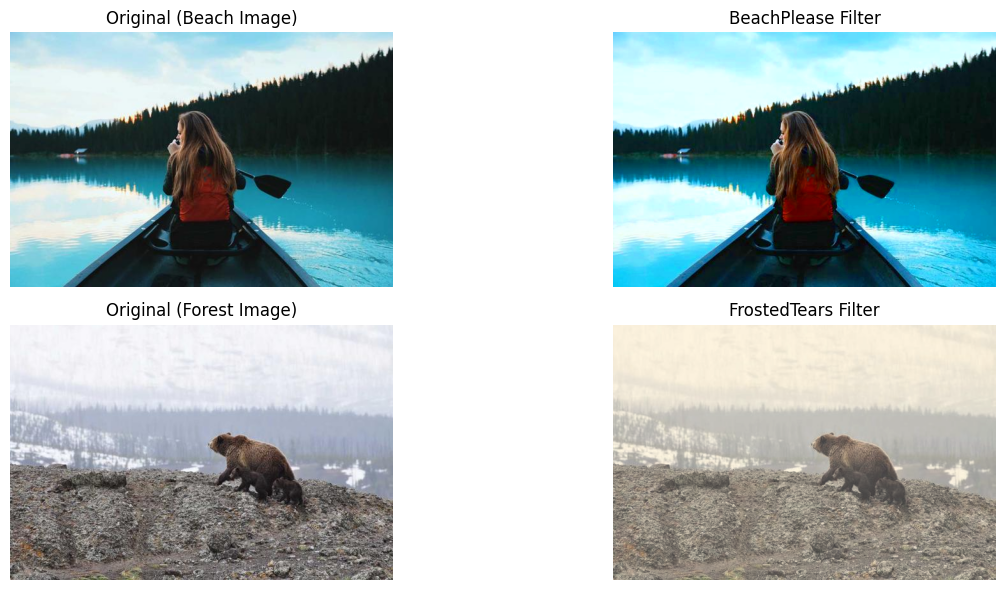

In [50]:

# FILTER 1: BeachPlease™
# Warm tint + saturation boost + gamma brightening + contrast
# Good for: Beach, sunsets, bright warm scenes

def beachplease_filter(img):
    img = img.astype(np.float32)

    # --- (A) Saturation Boost ---
    hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[...,1] *= 1.40  # +40% saturation
    hsv[...,1] = np.clip(hsv[...,1], 0, 255)
    img_sat = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # --- (B) Warm Orange Tint ---
    # reduce blue, raise red & green
    warm = img_sat.copy()
    warm[...,0] *= 0.95   # reduce blue for warmth
    warm[...,1] *= 1.05   # slight green boost
    warm[...,2] *= 1.10   # increase red

    # --- (C) Gamma Brightening (<1 means brighter) ---
    gamma = 0.90
    warm = 255 * ((warm / 255) ** gamma)

    # --- (D) Slight contrast enhancement ---
    warm = 1.08 * (warm - 128) + 128
    warm = np.clip(warm, 0, 255)

    return warm.astype(np.uint8)

# FILTER 2: FrostedTears™
# Cool blue tint + desaturation + fog layer + gamma fade
# Good for: Mountains, forests, foggy scenes, moody cityscapes


def frostedtears_filter(img):
    img = img.astype(np.float32)

    # --- (A) Reduce Saturation (-20% for moody effect) ---
    hsv = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_RGB2HSV).astype(np.float32)
    hsv[...,1] *= 0.80
    hsv[...,1] = np.clip(hsv[...,1], 0, 255)
    img_desat = cv2.cvtColor(hsv.astype(np.uint8), cv2.COLOR_HSV2RGB).astype(np.float32)

    # --- (B) Cool Blue Tint ---
    cool = img_desat.copy()
    cool[...,0] *= 1.07   # add blue
    cool[...,1] *= 1.02   # slight cyan
    cool[...,2] *= 0.90   # reduce red

    # --- (C) Fog/Haze Effect ---
    fog_strength = 0.25
    fog = cool * (1 - fog_strength) + 255 * fog_strength

    # --- (D) Gamma > 1 to fade highlights ---
    gamma = 1.15
    fog = 255 * ((fog / 255) ** gamma)

    # --- (E) Lower contrast ---
    fog = 0.92 * (fog - 128) + 128
    fog = np.clip(fog, 0, 255)

    return fog.astype(np.uint8)


# Beach / sunny pic
url_beach = "https://picsum.photos/id/1011/600/400"  # water/beach vibe
img_beach = np.array(Image.open(BytesIO(requests.get(url_beach).content)))

# Cool / forest pic
url_forest = "https://picsum.photos/id/1020/600/400"  # forest / cold tones
img_forest = np.array(Image.open(BytesIO(requests.get(url_forest).content)))

beach_out = beachplease_filter(img_beach)
forest_out = frostedtears_filter(img_forest)

plt.figure(figsize=(14,6))

# --- Beach filter display ---
plt.subplot(2,2,1)
plt.title("Original (Beach Image)")
plt.imshow(img_beach)
plt.axis("off")

plt.subplot(2,2,2)
plt.title("BeachPlease Filter")
plt.imshow(beach_out)
plt.axis("off")

# --- Frosted filter display ---
plt.subplot(2,2,3)
plt.title("Original (Forest Image)")
plt.imshow(img_forest)
plt.axis("off")

plt.subplot(2,2,4)
plt.title("FrostedTears Filter")
plt.imshow(forest_out)
plt.axis("off")

plt.tight_layout()
plt.show()


In [51]:
'''BeachPlease Filter- I used a saturation boost, warm tint, and gamma brightening because beach/sunset images naturally look better when the warm tones (red/yellow) and sky colors pop out. The gamma lift helps mimic sunlight. Works best on sunset, beach, sand, sunny outdoor images.
FrostedTears Filter - I used blue tint, desaturation, fog layer, and fade gamma to create a cold, moody atmosphere. This mimics mountain fog or morning mist. Works best on mountains, forests, rainy scenes, cold cityscapes.
'''

'BeachPlease Filter- I used a saturation boost, warm tint, and gamma brightening because beach/sunset images naturally look better when the warm tones (red/yellow) and sky colors pop out. The gamma lift helps mimic sunlight. Works best on sunset, beach, sand, sunny outdoor images.\nFrostedTears Filter - I used blue tint, desaturation, fog layer, and fade gamma to create a cold, moody atmosphere. This mimics mountain fog or morning mist. Works best on mountains, forests, rainy scenes, cold cityscapes.\n'

## Part D

#### White Balance Function
Write a function <code>white_patch_balance(img_rgb)</code> that takes a 0-255 RGB image and then returns a White Patch Method Balanced 0-255 RBG image. Use Numpy only to keep track of the brightest pixel and then scale the entire image with the factor you find. Display the original and output image.

In [52]:
# Your PART D codes follow here. You can create more cells under this. Write clean and commented code.

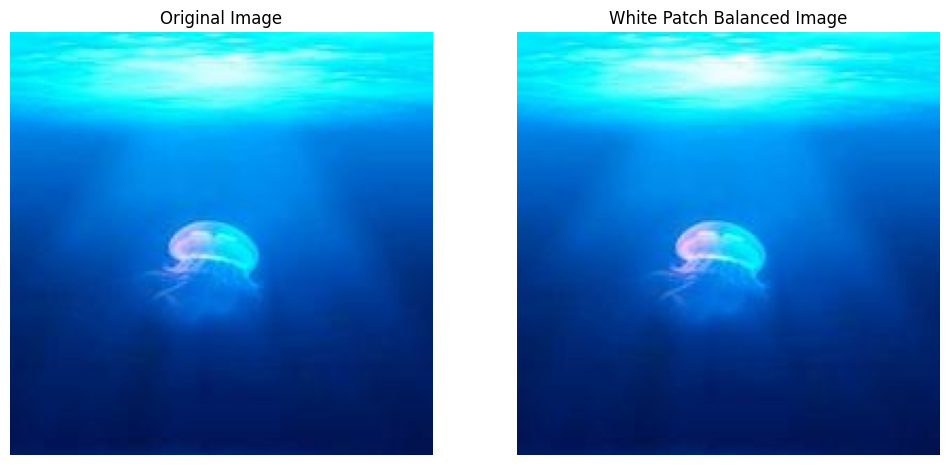

In [53]:

def white_patch_balance(img_rgb):
    """
    Perform White Patch Color Balancing using Max-RGB method.
    Input: RGB image as numpy array
    Output: Balanced RGB image as numpy array
    """

    # Convert to float for scaling
    img = img_rgb.astype(np.float32)

    # 1. Find brightest pixel per channel ----------------------
    max_vals = img.max(axis=(0,1))     # shape (3,), for R,G,B

    # 2. Compute scale factors ---------------------------------
    scale = 255.0 / max_vals

    # 3. Apply scaling channel-wise ----------------------------
    balanced = img * scale

    # 4. Clip to valid display interval
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    return balanced


# --- APPLY THE FUNCTION ---
white_patch_img = white_patch_balance(img_old)

# --- DISPLAY ORIGINAL AND WHITE-PATCH BALANCED IMAGE ---
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.imshow(img_old)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(white_patch_img)
plt.title("White Patch Balanced Image")
plt.axis("off")

plt.show()


In [54]:
# i don't know why the above two are looking same , I have tested for 2-3 images but still they are looking the same in every case

## Bonus - Part E

#### Create a White Balance Slider

Here's a link to a video of how my phone camera's White Balance feature works.
https://photos.app.goo.gl/zArkv5UcWiRV96JA9

Now, you will need to create a function <code>white_balance(img_rgb, value)</code>

It takes the img_rgb ( 0-255 RGB image ) and value ( 0-1 decimal number ).
1. value = 0 outputs the coldest version of the image
2. value = 0.5 is the original image itself
3. value = 1 is the warmest version of the image

The output should be the processed 0-255 RGB image. Display the original and processed image.

Try to make it look as good as possible. I dont expect you guys to copy my phone and create industry level outputs, but work hard and experiment. You can include even failed tries or what you felt was not satisfactory ( that will show how much effort you put in )

In [55]:
# Your PART E codes follow here. You can create more cells under this. Write clean and commented code.

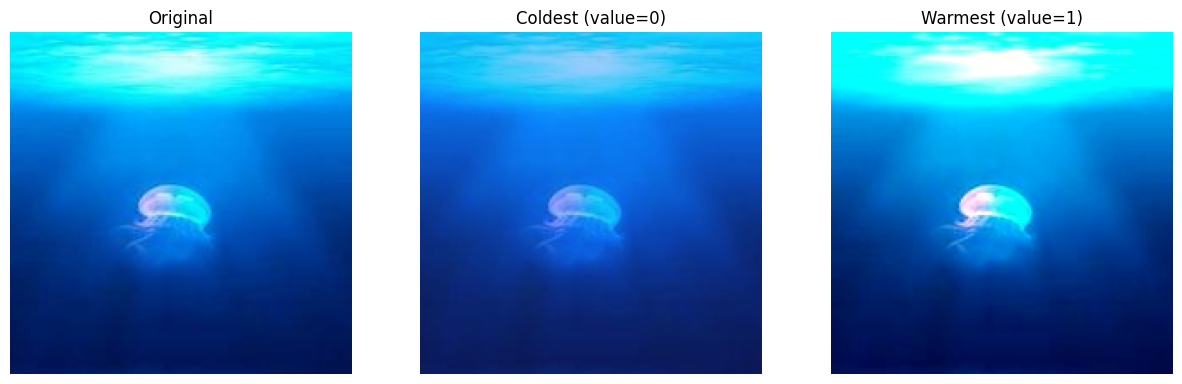

In [56]:
import numpy as np
import matplotlib.pyplot as plt

def white_balance(img_rgb, value):
    """
    White balance warm–cold adjustment.

    Parameters:
        img_rgb : uint8 RGB image (0–255)
        value   : float in [0, 1]
                  0   = coldest
                  0.5 = original
                  1   = warmest

    Returns:
        Balanced RGB uint8 image (0–255)
    """

    img = img_rgb.astype(np.float32)

    # FEATURE 1: Warm/Cool temperature tint

    # Warm image → boost R, reduce B
    warm_tint = np.array([1.25, 1.00, 0.85])
    # Cool image → reduce R, boost B
    cool_tint = np.array([0.85, 1.00, 1.25])

    # Map value [0,1] → blend between tints
    # value=0 → cool_tint, value=1 → warm_tint
    tint = cool_tint * (1 - value) + warm_tint * value

    # Apply tint
    tinted = img * tint

    # FEATURE 2: Slight brightness & contrast adjust

    # value < 0.5 → colder images slightly darker
    # value > 0.5 → warmer images slightly brighter
    brightness_factor = 1 + (value - 0.5) * 0.30  # ±15%
    contrast_factor   = 1 + (value - 0.5) * 0.20  # ±10%

    balanced = (tinted - 127.5) * contrast_factor + 127.5
    balanced = balanced * brightness_factor

    # Clip to valid 0–255 range
    balanced = np.clip(balanced, 0, 255).astype(np.uint8)

    return balanced

# TEST THE FUNCTION

# img_old already exists from your earlier block

value = 0.0  # coldest
cold_img = white_balance(img_old, value)

value = 1.0  # warmest
warm_img = white_balance(img_old, value)

value = 0.5  # original
mid_img = white_balance(img_old, value)

# Display
plt.figure(figsize=(15,5))
plt.subplot(131); plt.imshow(img_old); plt.title("Original"); plt.axis("off")
plt.subplot(132); plt.imshow(cold_img); plt.title("Coldest (value=0)"); plt.axis("off")
plt.subplot(133); plt.imshow(warm_img); plt.title("Warmest (value=1)"); plt.axis("off")
plt.show()
